# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_rows', 500)

In [7]:
da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

In [10]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5:
                                       "Never married", 6: "Living w/partner", 77: "Refused"})
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 

In [90]:
daq1= da.loc[:,['BPXSY1', 'BPXSY2','BPXDI1','BPXDI2']].dropna().corr()
daq1

,BPXSY1,BPXSY2,BPXDI1,BPXDI2
BPXSY1,1.000000,0.962287,0.317497,0.277681
BPXSY2,0.962287,1.000000,0.329843,0.298392
BPXDI1,0.317497,0.329843,1.000000,0.884722
BPXDI2,0.277681,0.298392,0.884722,1.000000


In [91]:
daq1= daq1.stack()
daq1 = pd.DataFrame(daq1).reset_index().rename(columns = {0 : 'value'})
daq1


,level_0,level_1,value
0,BPXSY1,BPXSY1,1.000000
1,BPXSY1,BPXSY2,0.962287
2,BPXSY1,BPXDI1,0.317497
3,BPXSY1,BPXDI2,0.277681
4,BPXSY2,BPXSY1,0.962287
5,BPXSY2,BPXSY2,1.000000
6,BPXSY2,BPXDI1,0.329843
7,BPXSY2,BPXDI2,0.298392
8,BPXDI1,BPXSY1,0.317497
9,BPXDI1,BPXSY2,0.329843


Text(0.5, 1.0, 'Comparison between diastolic blood pressures')

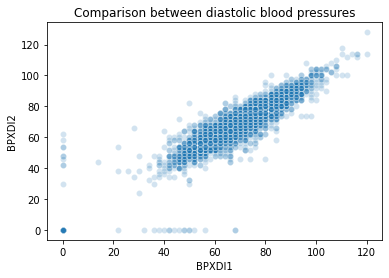

In [61]:
b = sns.scatterplot(x = 'BPXDI1', y = 'BPXDI2', data = da, alpha = 0.2)
b.set_title("Comparison between diastolic blood pressures")

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

In [54]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'DMDEDUC2x', 'DMDMARTLx', 'RIAGENDRx'],
      dtype='object')

In [62]:
daq1a = da.loc[:,['BPXSY1', 'BPXDI1']].dropna()
daq1b = da.loc[:,['BPXSY2','BPXDI2']].dropna()
print('{} is the correlation between the first measure of systolic and diastolic blood pressure.'.format(
    round(stats.pearsonr(daq1a.BPXSY1, daq1a.BPXDI1)[0],2)))
print('the correlation between the second measure of systolic and diastolic blood pressure is: {}'.format(
    round(stats.pearsonr(daq1b.BPXSY2, daq1b.BPXDI2)[0],2)))

0.32 is the correlation between the first measure of systolic and diastolic blood pressure.
the correlation between the second measure of systolic and diastolic blood pressure is: 0.3


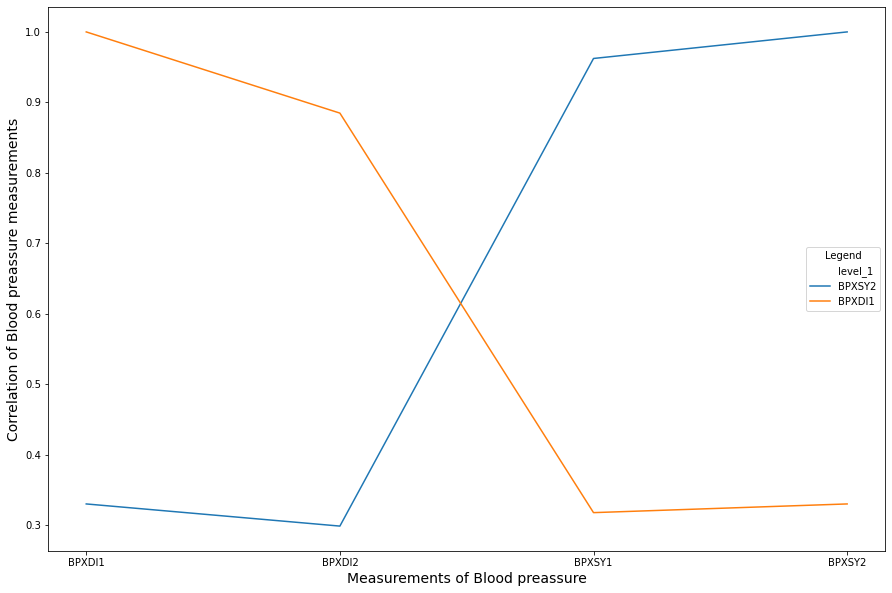

In [96]:
daq1edit = daq1.loc[(daq1.level_1 == 'BPXDI1') | (daq1.level_1 == 'BPXSY2')]
plt.figure(figsize= (15,10))
b = sns.lineplot(x = 'level_0', y = 'value', hue = 'level_1' , data = daq1edit)
plt.xlabel('Measurements of Blood preassure', fontsize = 14)
plt.ylabel('Correlation of Blood preassure measurements',  fontsize = 14)
plt.legend(title = 'Legend')

From the graph above we can understand better how the correlation varies through the 4x4 unstacked matrix. The correlation is 1.0 between same individuals and decreases as it advances, or the contrary. Considering that the greater interval between the four registered heart movements is between the BPXDI1 and BPXSY2, curiously, the correlation increases for BPXDI1 from the 3rd to 4th, and for BPXSY2, it decreases from the 1st to the 2d.

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

The first measures of pressure have a slightly higher correlation than the second.

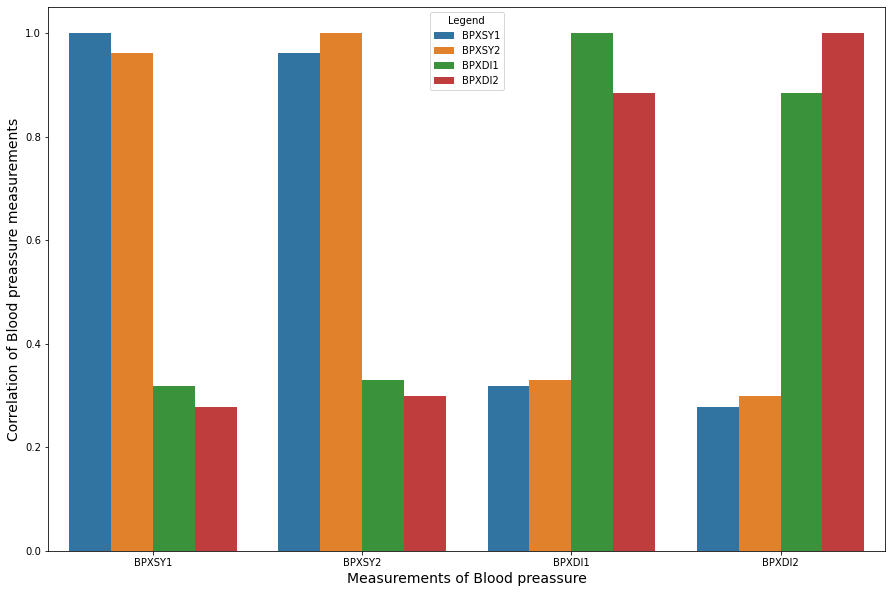

In [86]:
plt.figure(figsize= (15,10))
b = sns.barplot(x = 'level_0', y = 'value', hue = 'level_1' , data = daq1)
plt.xlabel('Measurements of Blood preassure', fontsize = 14)
plt.ylabel('Correlation of Blood preassure measurements',  fontsize = 14)
plt.legend(title = 'Legend')

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

It looks like sex and ethnicity do not influence the variation between the first systolic and diastolic blood pressure. There is no visual difference in the faceted scatter plots.


In [99]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'DMDEDUC2x', 'DMDMARTLx', 'RIAGENDRx'],
      dtype='object')

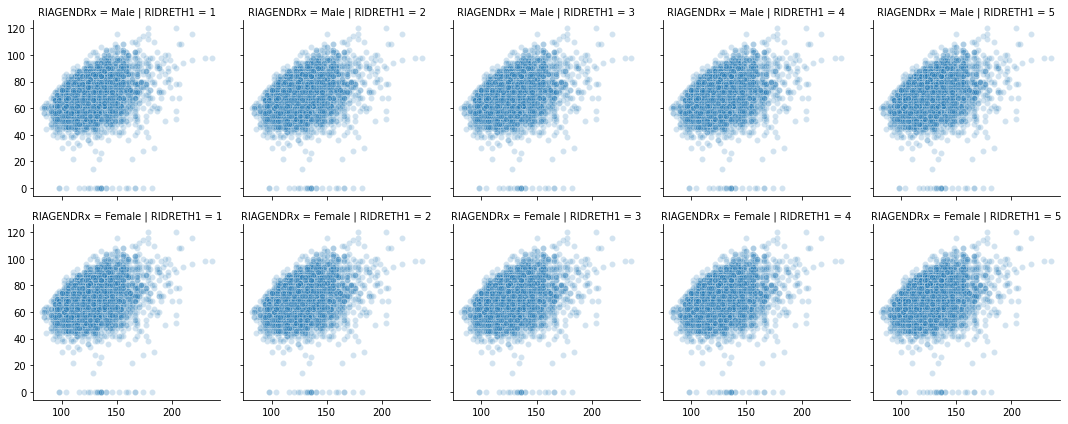

In [105]:
g = sns.FacetGrid(da, row = 'RIAGENDRx' , col ='RIDRETH1')
g.map(sns.scatterplot, x = 'BPXSY1', y = 'BPXDI1', data = da, alpha = 0.2)

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

The distribution of ages hued by educational attainment between Male and Female populations is roughly similar. But we can interpret interesting facts from this distributions. 
For 9-11 individuals, Female's curve is a unimodal bell-shaped distribution while the men's, is bimodal. It seems that men at 50s have higher educational attainment.

In adition to that, we can notice that elder colleges are more likely to be men. Although both distributions are skewed to right, college females are less frequent between elderly individuals, and females distribution's peak is greater than men's.

In [109]:
da['RIDAGEYRx'] = pd.cut(da.RIDAGEYR,
                        bins = [18,30,40,50,60,70,80],
                        labels = ['18 to 30','31 to 40', '41 to 50', '51 to 60', '61 to 70', '71 to 80'])

In [138]:
damale = da.loc[da.RIAGENDRx == 'Male'].sort_values(by = ['DMDEDUC2x']).loc[~da.DMDEDUC2x.isin(["Don't know"])]
dafemale = da.loc[da.RIAGENDRx == 'Female'].sort_values(by = ['DMDEDUC2x']).loc[~da.DMDEDUC2x.isin(["Don't know"])]

In [139]:
damale

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDEDUC2x,DMDMARTLx,RIAGENDRx,RIDAGEYRx
548,84676,1.0,NaN,NaN,1,1,70,3,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,9-11,Married,Male,61 to 70
3453,89669,1.0,NaN,3.0,2,1,52,2,2.0,2.0,...,30.1,39.7,38.2,34.6,108.1,2.0,9-11,Married,Male,51 to 60
1586,86417,1.0,NaN,3.0,1,1,40,4,1.0,2.0,...,23.9,42.4,38.0,33.0,83.9,2.0,9-11,Living w/partner,Male,31 to 40
693,84920,1.0,NaN,4.0,2,1,35,4,1.0,2.0,...,26.4,45.6,38.5,38.2,95.1,NaN,9-11,Married,Male,31 to 40
691,84917,1.0,NaN,NaN,1,1,32,1,1.0,2.0,...,32.4,42.5,40.5,38.3,112.2,2.0,9-11,Never married,Male,31 to 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,93446,2.0,2.0,NaN,2,1,19,5,1.0,NaN,...,18.7,38.5,37.0,24.6,72.8,2.0,NaN,NaN,Male,18 to 30
5604,93478,1.0,NaN,5.0,2,1,19,4,2.0,NaN,...,22.7,45.9,38.6,29.7,81.6,2.0,NaN,NaN,Male,18 to 30
5629,93519,2.0,2.0,NaN,2,1,19,5,2.0,NaN,...,20.0,41.8,33.4,25.1,72.0,2.0,NaN,NaN,Male,18 to 30
5655,93564,1.0,NaN,5.0,2,1,18,2,1.0,NaN,...,20.6,45.3,38.5,27.0,74.2,2.0,NaN,NaN,Male,NaN


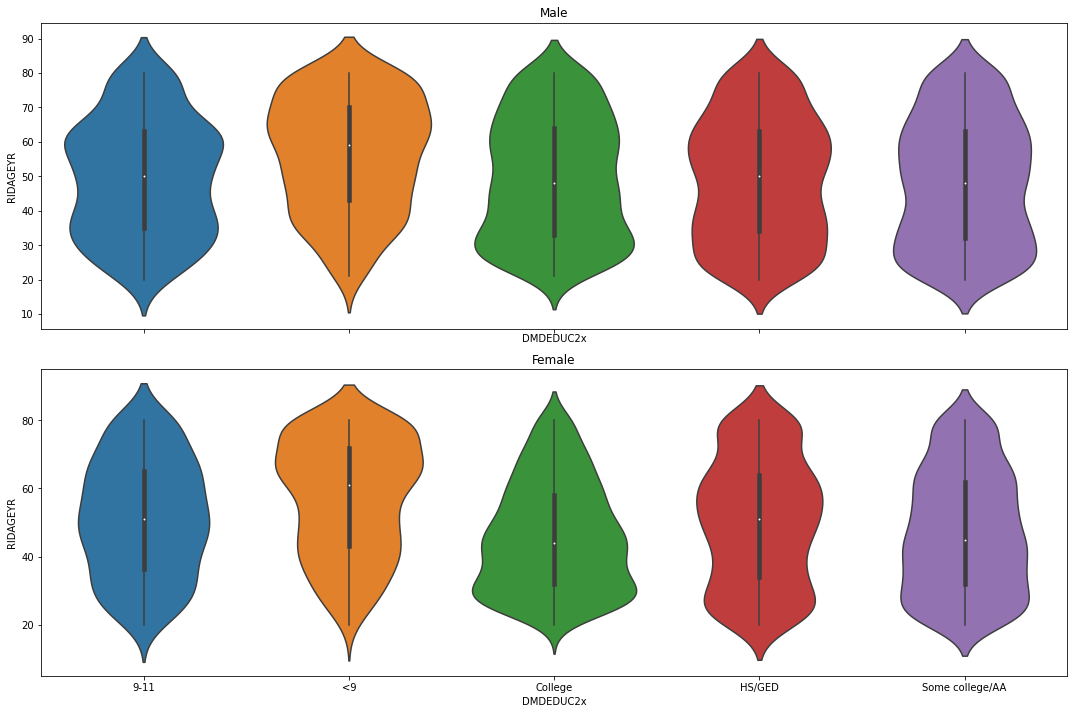

In [141]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (15,10), sharex = True)
sns.violinplot( x = 'DMDEDUC2x', y = 'RIDAGEYR', data = damale, ax = ax1).set_title('Male')
sns.violinplot( x = 'DMDEDUC2x', y = 'RIDAGEYR', data = dafemale, ax = ax2).set_title('Female')
plt.tight_layout(pad = 1.0)

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

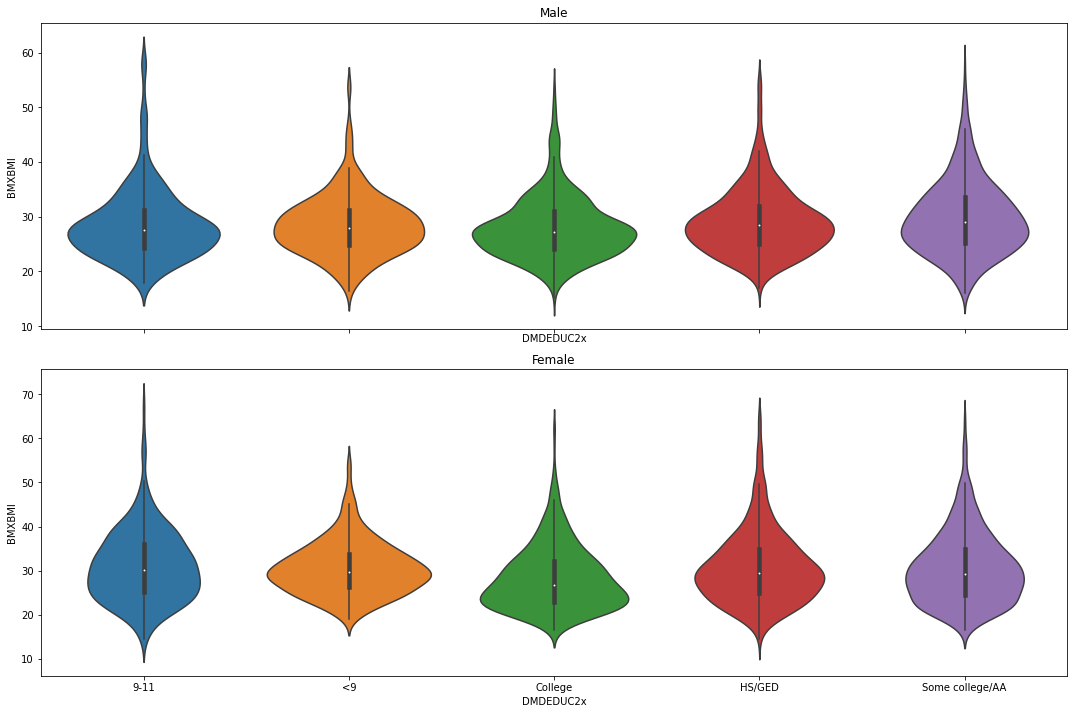

In [143]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (15,10), sharex = True)
sns.violinplot( x = 'DMDEDUC2x', y = 'BMXBMI', data = damale, ax = ax1).set_title('Male')
sns.violinplot( x = 'DMDEDUC2x', y = 'BMXBMI', data = dafemale, ax = ax2).set_title('Female')
plt.tight_layout(pad = 1.0)

__Q5a.__ Comment on the trends in BMI across the demographic groups.

For both genders, the BMI distributions across different educational attainment levels have a median the generally is under 30. Every curve is unimodal and right-skewed. Nonetheless, the femele distributions reveal some differences. The distribution of those females who have an educational attainment lower than nineth grade, seems to have its median slightly bigger, which means their BMI is generally higher. College females, on the other hand, seem to be more fit. 
Outliers are more frequent at the 9-11 level.

For men, it's worth noticing that the lowest is for college individuals.


## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Surprisingly, the ethinic group with highest income rate has the highest rate of being uninsured.

In [171]:
da.RIDRETH1 = da.RIDRETH1.replace({1: "Mexican American",
                    2: 'Other Hispanic',
                    3: 'Non-Hispanic White',
                    4: 'Non-Hispanic Black',
                    5: 'Other Race - Including Multi-Racial'})
da.HIQ210 = da.HIQ210.replace({1: 'Yes',
                                   2: 'No',
                                   3: 'Refused',
                                   9: "Don't know"})

In [178]:
daq5 = da.groupby(['RIDRETH1', 'HIQ210']).size().unstack()

In [186]:
daq5.apply(lambda z: round(z * 100 / z.sum(), 2), axis = 1)

HIQ210,Don't know,No,Yes
RIDRETH1,,,
Mexican American,0.45,85.76,13.80
Non-Hispanic Black,0.10,89.04,10.87
Non-Hispanic White,0.12,93.14,6.74
Other Hispanic,NaN,87.13,12.87
Other Race - Including Multi-Racial,0.25,91.57,8.18
